## Steps needs to perform
<ol>
    <li>Convert To Lower Case.</li>
    <li>Contarctions, spelling.</li>
    <li>Extract tags( like #, @) and social platform.</li>
    <li>Extract number, emails, address.</li>
    <li>Entity Extract person name, country name, datetime, event</li>
    <li>Polarity (Unigrams, Bigram and trigram)</li>
    <ol>
        <li>Fine-grained Sentiment Analysis</li>
    </ol>
    <li>Extract Positive words and Negative words</li>
    <li>Length of sentence</li>
    <li>Average word length in sentence</li>
    <li>Vocabulary</li>
</ol>

In [1]:
df = pd.read_csv("./Fake.csv", nrows = 200)

<IPython.core.display.Javascript object>

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

In [ ]:
df.subject.unique()

In [2]:
df.drop(columns=['date'], axis=1, inplace=True)

In [ ]:
df.title[0]

In [3]:
df.title = df.title.map(lambda x: str(x).lower())

In [4]:
df.text = df.text.map(lambda x: str(x).lower())

In [5]:
def get_clean_text(text):
    text = re.sub("\bll\b",    "will", text)
    text = re.sub("\b&\b",     "and", text)
    text = re.sub(r"let s",   "lets", text)
    
    text = re.sub(r"couldn t", "couldn't", text)
    text = re.sub(r"can t",    "can't", text)
    
    text = re.sub(r"won t",    "willn't", text)
    text = re.sub(r"wouldn t", "wouldn't", text)
    text = re.sub(r"weren",    "were not", text)
    text = re.sub(r"wasn t",   "was not", text)
    
    text = re.sub(r"don t",    "do not", text)
    text = re.sub(r"didn t",   "did not", text)
    text = re.sub(r"doesn t",   "does not", text)
    
    text = re.sub(r"it s",     "it is", text)
    text = re.sub(r"aren t",   "are not", text)
    text = re.sub(r"isn t",    "is not", text)

    text = re.sub(r"he s",     "he is", text)
    text = re.sub(r"hasn",     "has not", text)
    

    text = re.sub(r"i d",      "i would", text)
    text = re.sub(r"i m",      "i am", text)
    
    text = re.sub(r'\([^()]*\)','', text)
    text = re.sub(r'\d','', text)
    text = re.sub(r"\s+"," ", text, flags = re.I)
    
    return text

In [6]:
def get_clean_specialCharacters(text):
    text = re.sub(r'\([^()]*\)','', text)
    text = re.sub(r'[@]\w+','', text)
    text = re.sub(r'[#]\w+','', text)
    text = re.sub(r'[.,!?$:]','', text)
    text = re.sub(r'\w+[\d]\w+','', text)
    text = re.sub(r'\d','', text)
    text = re.sub(r"\s+"," ", text, flags = re.I)
    return text

In [ ]:
text = "@ABC data is not (hello) $91 Dec91"
print(get_clean_specialCharacters(text))

In [ ]:
def get_one_line_words(text):
    data=text.split()
    for i in range(len(data)):
        if((i>0) & (len(data[i])==1) & (len(data[i-1])<=6)):
            print(f'{data[i-1]} {data[i]}: {nltk.pos_tag([data[i-1]])}')

In [ ]:
# df.text = df.text.map(get_clean_text)

In [ ]:
# for index in range(30, 50):
#     get_one_line_words(df.text[index])

In [18]:
data = []
for index in range(0,1):
    data.append(df.text[index])

demo = ' '.join(data)

In [8]:
words = nltk.tokenize.word_tokenize(demo)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
rslt.head()

,Word,Frequency
0,",",224
1,the,187
2,.,129
3,to,113
4,of,99


In [ ]:
# regex = re.compile(r'twitter.com')
# if regex.search(demo):
#     print('matched')
print(re.findall(r'[@]\w+', demo))

In [ ]:
print(re.findall(r'[#]\w+', demo))

In [ ]:
match = re.search(r'[\w.-]+.com', demo)
print (match.group())
if match:
    print( 1  if match.group() else 0 )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

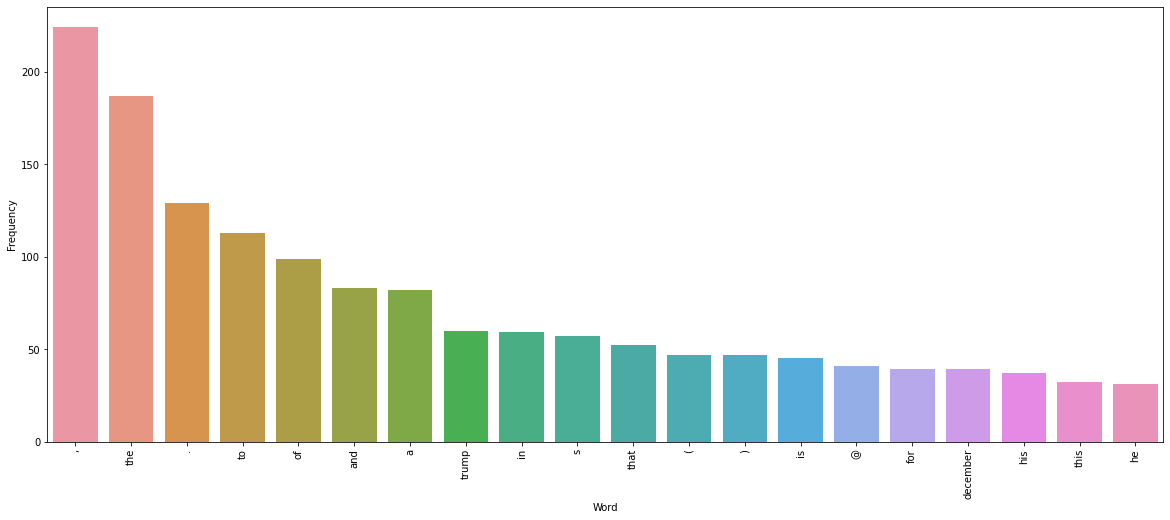

In [10]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(data=rslt[:20], x="Word", y='Frequency', )

## Contraction Text and Clean Special Characters

In [38]:
demo1 = demo

In [39]:
demo1 = get_clean_specialCharacters(demo1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
stop = nltk.corpus.stopwords.words('english')

<IPython.core.display.Javascript object>

In [41]:
text = []
for word in demo1.split():
    if word not in stop:
        text.append(word)
demo1 = ' '.join(text)

In [42]:
words = nltk.tokenize.word_tokenize(demo1)
word_dist = nltk.FreqDist(words)
rslt1 = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
rslt1.shape

(100, 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Frequency', ylabel='Word'>

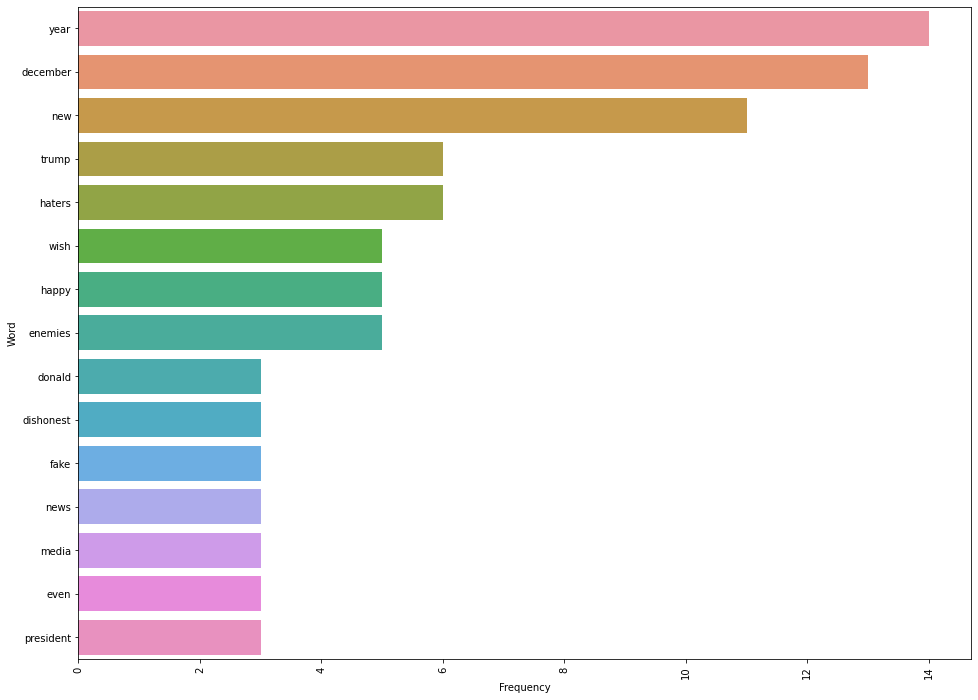

In [49]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data=rslt1.head(15), y="Word", x='Frequency', )

In [45]:
demo1

'donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year great year america donald j trump december tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan december one likes calvin december impeachment would make great year america also accept regaining control congress miranda yaver december hear talk include many people hate wonder hate alan sandoval december uses word haters new years wish marlene december say happy ne

In [50]:
from textblob import TextBlob

In [66]:
TextBlob("The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January.").sentiment

Sentiment(polarity=-0.005555555555555536, subjectivity=0.7305555555555555)

In [72]:
TextBlob("enemies haters very dishonest fake ").sentiment

Sentiment(polarity=-0.445, subjectivity=0.825)

In [59]:
demo

'donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t ev